In [1]:
import numpy as np
import IPython
from PIL import Image
import tensorflow as tf

In [2]:
tf.version.VERSION

'2.0.0-rc0'

In [3]:
imported = tf.saved_model.load("models/fast_style_kanagawa/export/transform_net")

In [4]:
model = imported.signatures["serving_default"]

In [5]:
im = tf.image.decode_image(tf.io.read_file("./images/content_targets/katya.jpg"))

In [6]:
im = tf.expand_dims(im, 0)

In [7]:
transformed_im = model(transform_input=tf.cast(im, tf.float32))

In [8]:
transformed_im = tf.cast(tf.round(transformed_im["transform_output"]), tf.uint8)

In [9]:
Image.fromarray(np.squeeze(transformed_im.numpy())).save("images/fast_style_kanagawa/results/image.jpg")

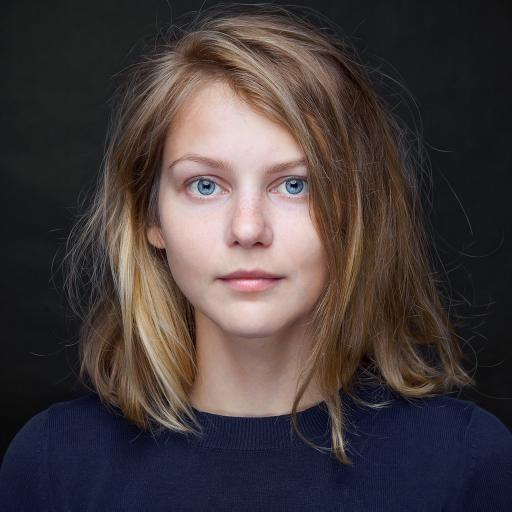

In [10]:
IPython.display.Image("./images/content_targets/katya.jpg")

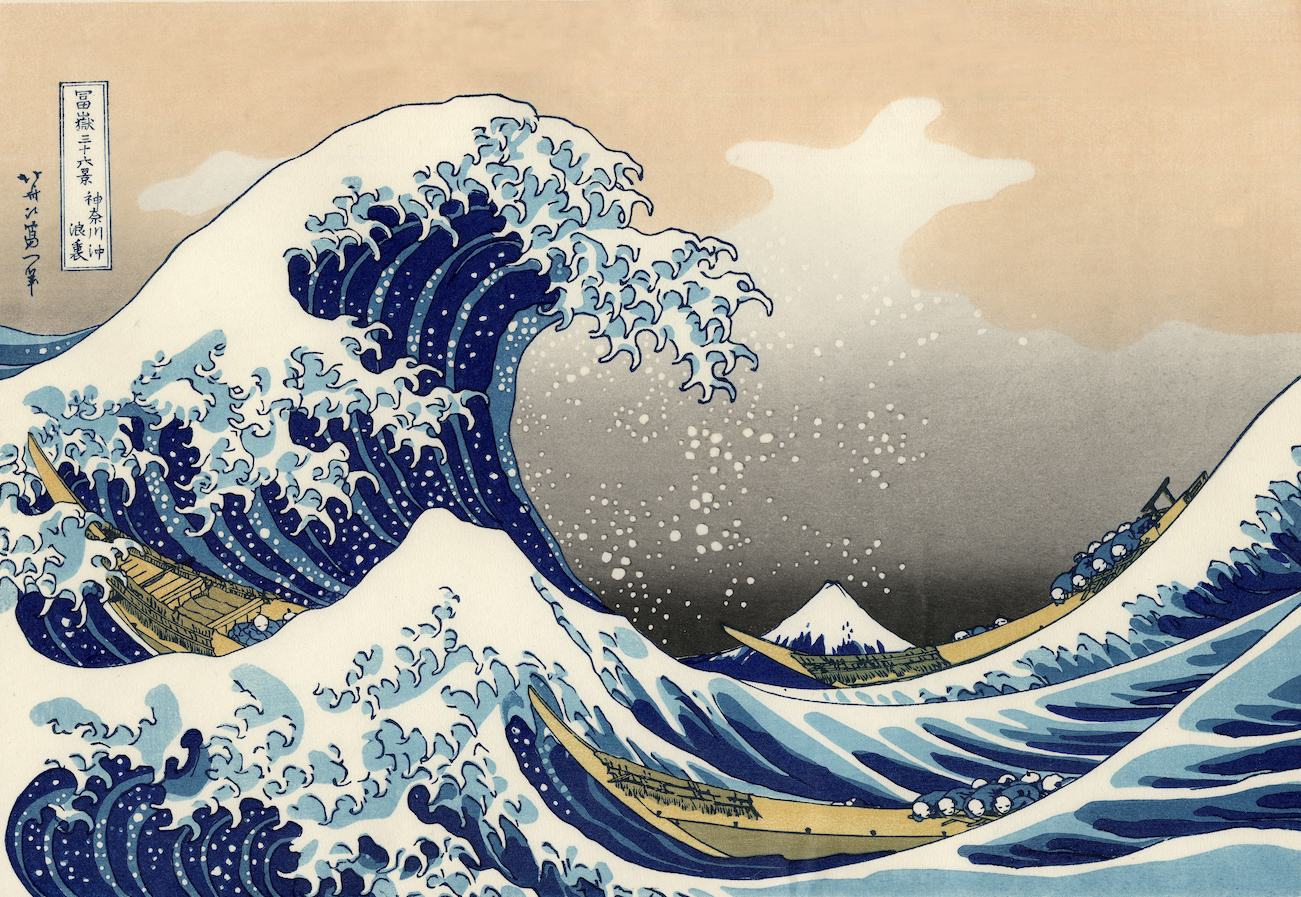

In [11]:
IPython.display.Image("./images/style_targets/hokusai__the_great_wave_off_kanagawa.jpg")

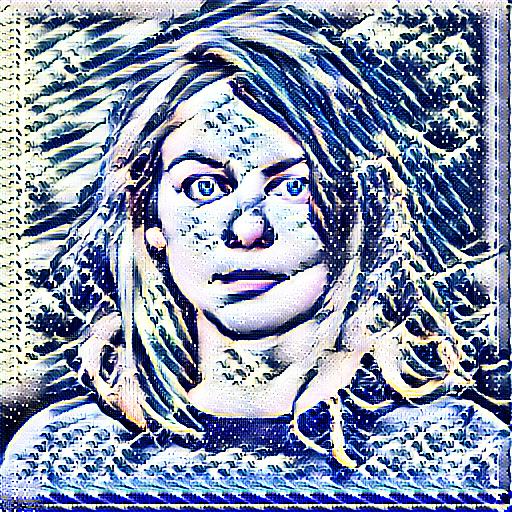

In [12]:
IPython.display.Image("images/fast_style_kanagawa/results/image.jpg")